# 

In [2]:
def array_id2idxs(cat_file):
    length = len(cat_file)
    if length <=2:
        cat = '0'
        file_idx = cat_file
    else:
        cat = cat_file[0]
        file_idx = cat_file[1:]
    return (cat, file_idx)

In [13]:
assert array_id2idxs('0') == ('0', '0')
assert array_id2idxs('10') == ('0', '10')
assert array_id2idxs('207') == ('2', '07')
assert array_id2idxs('210') == ('2', '10')
print("all tests passed")

all tests passed


In [50]:
import os
dire = '/gpfs/scratch/jic286/BrandesLab/DMS_5fcv_outputs/per-gene/first-50-12-13-2024'
outputs = []
for out in os.listdir(dire):
    if "output" in out:
        outputs.append(out)
print(len(outputs))



51


In [58]:
import pandas as pd
complete = []
data = {x:[] for x in ['gene','seq_count', 'training_time', 'NRMSE', 'R2']}
keys = ["gene ", "sequences: ", "took ", "RMSE: ", "R^2: "]
ends = [" on", "\n", " seconds", "\n", "\n"]
key_dict = dict(zip(keys, data.keys()))
# print(key_dict)
for out in outputs:
    with open(os.path.join(dire, out), 'r') as f:
        fulltext = "".join(f.readlines())
        # print(fulltext)
        # break
        if "MSE" in fulltext:
            # print(fulltext)
            complete.append(out)
            for i, key in enumerate(keys):
                line = fulltext[fulltext.find(key) + len(key):]
                # print(val)
                val = line[:line.find(ends[i])]
                if i in [1, 2]:
                    val = int(val)
                elif i in [3, 4]:
                    val = float(val)
                data[key_dict[key]].append(val)
            # key = "sequences: "
            # secline = fulltext[fulltext.find(key) +len(key):]
            # # print(int(secline[:secline.find("\n")]))
            # print(fulltext)
# print(len(complete))
df = pd.DataFrame(data)
complete
print(f"Mean NRMSE: {df['NRMSE'].mean()} Mean R^2: {df['R2'].mean()}")


Mean NRMSE: -455405.4924326095 Mean R^2: -0.36936871489958795


In [59]:
###SPG1 failed, OOM

In [76]:
df[df['gene']=='A0A192B1T2']

,gene,seq_count,training_time,NRMSE,R2
22,A0A192B1T2,12577,7,-2.663384,-0.737247


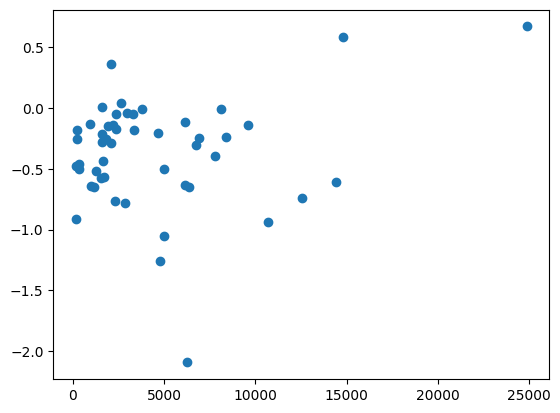

In [61]:
import matplotlib.pyplot as plt
plt.scatter(df['seq_count'], df['R2'])

0.19320310509128225


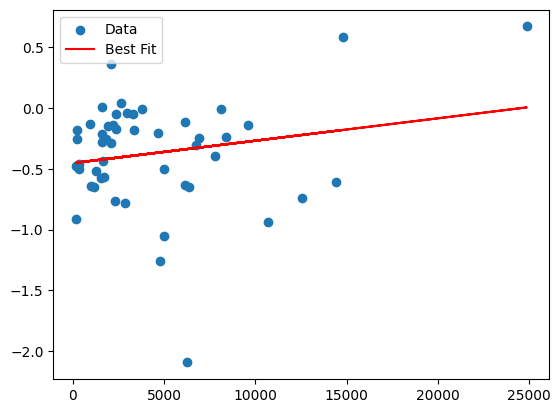

In [75]:
import scipy
import numpy as np
fig, ax = plt.subplots()
x = np.array(df['seq_count']).reshape(len(df), 1)
X = np.append(x, np.ones((len(df), 1)), axis=1)
y = np.array(df['R2']).reshape(len(df), 1)
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
y_line = X.dot(theta)
ax.scatter(df['seq_count'], df['R2'])
ax.plot(x, y_line, 'r')
plt.legend(['Data', 'Best Fit'])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(df['seq_count'], df['R2'])
# # print(sorted_freqs[:1000])
print(r_value)

In [8]:
from tqdm import tqdm
import numpy as np
def one_hot_encode(seq, max_len=None):
    amino_acids = "".join(["A", "R", "N", "D", "C", "Q", "E", "G", "H", "I", "L", "K", "M", "F", "P", "S", "T", "W", "Y", "V"])
    mapping = dict(zip(amino_acids, range(len(amino_acids))))
    seq2 = [mapping[i] for i in seq]
    seq2 = np.eye(len(amino_acids))[seq2]
    if max_len is not None:
        if len(seq2) < max_len:
            seq2 = np.vstack([seq2, np.zeros((max_len - len(seq2), len(amino_acids)))])
        elif len(seq2) > max_len:
            seq2 = seq2[:max_len, :]
    return seq2
def one_hot_multiple(seqs, max_len=None, bar=False):
  if bar:
    out = []
    for seq in tqdm(seqs):
      out.append(one_hot_encode(seq, max_len))
    seqs = out
  else:
    seqs = [one_hot_encode(seq, max_len) for seq in seqs]
  seqs = np.array(seqs)
  seqs = seqs.reshape(seqs.shape[0], -1)
  return seqs

In [12]:
test_pre = ["".join([aas[rng.randint(0, 20)] for i in range(15)]) for j in range(10)]
test_con = one_hot_multiple(test_pre, max_len=6)


In [5]:
from tqdm import tqdm
aas = ["A", "R", "N", "D", "C", "Q", "E", "G", "H", "I", "L", "K", "M", "F", "P", "S", "T", "W", "Y", "V"]
test_amount = 1000
test_len = 3423
samples = []
rng = np.random.RandomState(42)
for i in tqdm(range(test_amount)):
    samples.append("".join([aas[rng.randint(0, 20)] for j in range(test_len)])) 

set(samples[0])

100%|██████████| 1000/1000 [00:07<00:00, 140.81it/s]


{'A',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'V',
 'W',
 'Y'}

In [ ]:
# one_hot = one_hot_multiple(samples[:100000], max_len = 3500, bar=True) 

five_hun_k = np.concatenate([samples * 600])
print(len(five_hun_k))
#52 seconds at 107386 w/max_len = 3423
five_hun_k = one_hot_multiple(five_hun_k, max_len=3500, bar=True)
print(five_hun_k.shape)

600000


 77%|███████▋  | 464240/600000 [04:06<01:11, 1890.19it/s]

In [30]:
bar = True
bmark_100 = one_hot_multiple(samples[:100], max_len=test_len, bar=bar)
bmark_1k = one_hot_multiple(samples, max_len=test_len, bar=bar)
bmark_10k = one_hot_multiple(samples * 10, max_len=test_len, bar=bar)
bmark_100k = one_hot_multiple(samples * 100, max_len=test_len, bar=bar)

100%|██████████| 100000/100000 [00:33<00:00, 2976.30it/s]


In [26]:
print(bmark_1k.shape)

(1000, 68460)


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
global times
times = {key:[] for key in ["fit", "predict", "total"]}
import time
def run_rfr(X, y, verbose=1):
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    start_time = time.time()

    # Initialize and train the RandomForestRegressor
    rf_regressor = RandomForestRegressor(random_state=42)  # You can adjust hyperparameters
    rf_regressor.fit(X_train, y_train)
    
    fit_time = time.time() - start_time
    times['fit'].append(fit_time)
    print(f"Time to fit to {len(X_train)} samples:{fit_time:.2f} seconds")
    
    # Make predictions on the test set
    y_pred = rf_regressor.predict(X_test)
    
    predict_time = time.time() - (start_time + fit_time)
    times['predict'].append(predict_time)
    print(f"Time to predict from {len(X_test)} samples:{predict_time:.2f} seconds")
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"R-squared (R2): {r2}")
    print(f"Total time to process {len(X)} samples: {(time.time() - start_time):.2f} seconds")
    return rf_regressor


In [ ]:
import time
import numpy as np
models = []
for X in [bmark_100, bmark_1k, bmark_10k, bmark_100k]:
    y = np.random.randn(len(X))
    models.append(run_rfr(X, y, verbose=1))
    
            

Time to fit to 80 samples:25.29 seconds
Time to predict from 20 samples:0.01 seconds
Mean Squared Error (MSE): 1.123306527988618
R-squared (R2): -0.21444255352753117
Total time to process 100 samples: 25.29 seconds
